<a href="https://colab.research.google.com/github/divyakedia/Rented-Bike-Demand-Prediction-Seoul-/blob/main/Copy_of_Copy_of_Regression_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -**   Divya Kedia
##### **Team Member 2 -**   Sakshi Ghugare


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [550]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [551]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [552]:
df = pd.read_csv('/content/drive/MyDrive/Regression Capstone Project/SeoulBikeData.csv',encoding = "ISO-8859-1")

### Dataset First View

In [553]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [554]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [555]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [556]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [557]:
# Missing Values/Null Values Count
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

This dataset contains no null or missing values.

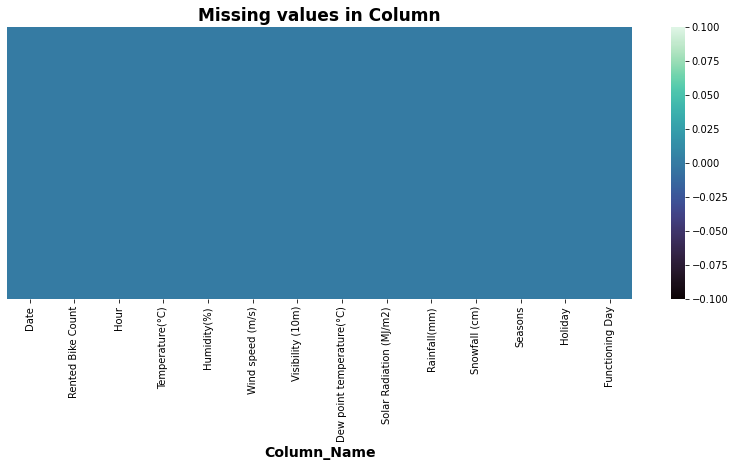

In [558]:
# Visualizing the missing values
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(),  cmap="mako", yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Missing values in Column",fontweight="bold",size=17)
plt.show()

### What did you know about your dataset?

The dataset given is the dataset of the Bike data from the city Seoul in South Korea and using this data we have to analyse the bike demand and the insights behind it. This bike sharing Demand prediction is the analytical study so as to make the rental bike available and accessible to the public at the right time hence reducing the waiting period.

The given dataset has 8760 rows and 14 columns. There are no null/missing value as well as duplicate values.

## ***2. Understanding Your Variables***

In [559]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [560]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

## **Data Fields:**

1. Date : year-month-day

2. Rented Bike count - Count of bikes rented at each hour

3. Hour - Hour of the day

4. Temperature-Temperature in Celsius

5. Humidity - %

6. Windspeed - m/s

7. Visibility - 10m

8. Dew point temperature - Celsius

9. Solar radiation - MJ/m2

10. Rainfall - mm

11. Snowfall - cm

12. Seasons - Winter, Spring, Summer, Autumn

13. Holiday - Holiday/No holiday

14. Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)Answer Here

### Check Unique Values for each variable.

In [561]:
# Check Unique Values for each variable.
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [562]:
# Write your code to make your dataset analysis ready.

#Since the variables having units with name, renaming columns for better variable analysis.
df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                   'Temperature(°C)':'Temperature',
                   'Humidity(%)':'Humidity',
                   'Wind speed (m/s)':'Wind_speed',
                   'Visibility (10m)':'Visibility',
                   'Dew point temperature(°C)':'Dew_point_temperature', 
                   'Solar Radiation (MJ/m2)':'Solar_Radiation',
                   'Rainfall(mm)':'Rainfall',
                   'Snowfall (cm)':'Snowfall',
                   'Functioning Day':'Functioning_Day'},
          inplace=True)


In [563]:
# # Change The datatype of Date column to extract "Day ", "Month", "Year".So  further we can analyze the Bike rentals with respect to Day, Month and year respectively.
df['Date']=df['Date'].astype('datetime64[ns]')


In [564]:
# Breaking down the "Date" column into 3 new columns "Day", "Month", "year".
df['Day']=df['Date'].dt.day_name()   
df['Month']=df['Date'].dt.month
df['year'] = df['Date'].dt.year


In [565]:
#creating a new column of "week" and drop the column "Date","Day","year"
df['week']=df['Day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','Day','year'],axis=1)

In [566]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [567]:
# checking no of years
df['week'].value_counts()

0    6216
1    2544
Name: week, dtype: int64

In [568]:
df['timeshift'] = df['Hour'].apply(lambda x: 'night' if 0<=x<=6 else ('day' if 7<=x<=16 else 'evening'))

In [569]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,week,timeshift
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0,night
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0,night
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0,night
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0,night
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0,night


In [570]:
df['timeshift'].value_counts()

day        3650
night      2555
evening    2555
Name: timeshift, dtype: int64

In [571]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  Month                  8760 non-null   int64  
 14  week                   8760 non-null   int64  
 15  time

In the above table it is shown that "Hour", "Month" And "Week" are integer datatype but actually they are categorical datatype. so as to avoid the problem and confusion it is advisable to change the datatype of the mentioned columns.

In [572]:
#Change the int64 column into catagory column
colm=['Hour','Month','week']
for col in colm:
  df[col]=df[col].astype('category')

In [573]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  Month                  8760 non-null   category
 14  week                   8760 non-null   c

In [574]:
df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Month', 'week',
       'timeshift'],
      dtype='object')

In [575]:
df["week"].unique()

[0, 1]
Categories (2, int64): [0, 1]

### What all manipulations have you done and insights you found?

So as to get the clear idea about the data we have done a few manipulations. First we broke the Date column and split the column into 3 categories that is Day, Month, and year. Also we created a new column of week from the day and divided it into binary classification as 0 for weekdays and 1 for weekends.
Also we dropped the columns which were not signuficant for further usage.
We have also changed the datatype of certain columns to avoid further problem and confusion.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Before staring the visualization part let us divide the visualization in two different parts i.e 

1.   Categorical Variables.
2.   Numerical Variables.

Our Dependent Variable is "Rented bike Count" therefore, we will analyse this column with other independent columns using visualization so as to learn more about data.

Therefore lets first start with categorical variable followed by numerical variables.




## **Analysis of Categorical Variables**


What is categorical variables?

### **Categorical data is the statistical data type consisting of categorical variables or of data that has been converted into that form. These categories are based on qualitative characteristics.**

#### **Chart - 1  Pie Chart on Independent variable "Week" (Univariate)**

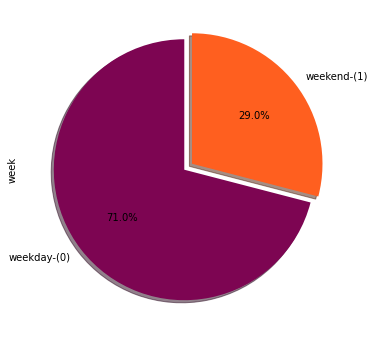

In [576]:
# Chart - 1 visualization code
df['week'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['weekday-(0)','weekend-(1)'],
                               colors=['#7D0552','#FF5F1F'],
                               explode=[0,0.075]
                              )

##### 1. Why did you pick the specific chart?

 **A pie chart represents the contribution of each part of the data to a whole and it makes very easy to understand the data.Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time. Which was exactly needed thus we selected pie chart.**

##### 2. What is/are the insight(s) found from the chart?

**As we can see from the above data that 71% demand of the bikes is during weekday which we denoted as "0" and 29% demand is during weekend.Thus it can be said that more bikes are needed during the weekdays than the weekends.**


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 2 Pie Chart on Independent variable "Timeshift" (Univariate)**


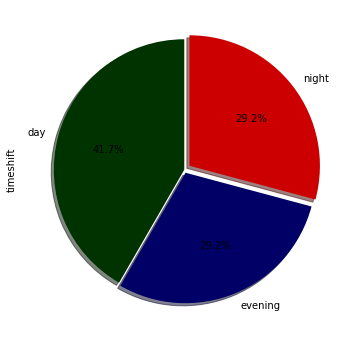

In [577]:
# Chart - 2 visualization code
df['timeshift'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=["day","evening","night"],
                               colors=['#003300','#000066',"#cc0000"],
                               explode=[0,0.025,0.05])

##### 1. Why did you pick the specific chart?

**A pie chart represents the contribution of each part of the data to a whole and it makes very easy to understand the data.Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time. Which was exactly needed thus we selected pie chart.**

##### 2. What is/are the insight(s) found from the chart?

**From the above Pie chart we can see that the most demand of tental bikes is during the day shift with total of 41.7% and then followed by evening and night shift both with the same percentage of 29.2%.**
**Therefore we can say that the demand of the bike is more during the day time as compared to other shifts of the day.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### **Chart - 3 - Line Chart on Average Bikes Rented per Hour (Bivariate)**

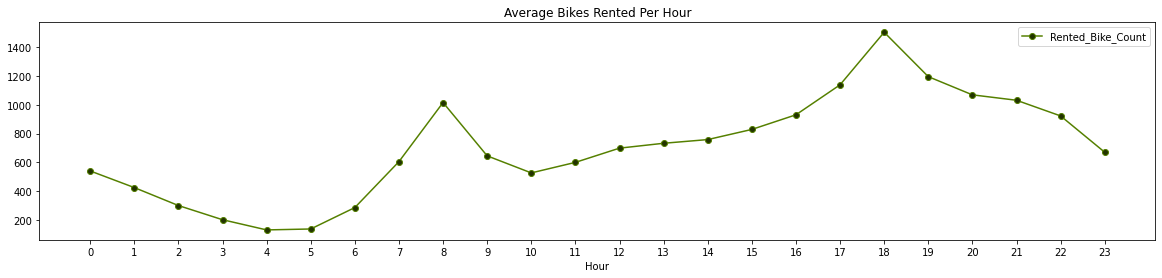

In [578]:
# Chart - 3 visualization code
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df.groupby('Hour')['Rented_Bike_Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',color = "#558000",markerfacecolor="#223300",title="Average Bikes Rented Per Hour")
a.set_xticks(range(len(avg_rent_hrs)))
a.set_xticklabels(avg_rent_hrs.index.tolist());

##### 1. Why did you pick the specific chart?

**Line graphs can be used to show how something changes over time. Line graphs are good for plotting data that has peaks (ups) and valleys (downs), or that was collected in a short time period.A line graph connects individual data points that, typically, display quantitative values over a specified time interval.**
**Therefore to show the rented bike demand over a period of time for 24 hrs Lime graph was most suitable and hence used.**

##### 2. What is/are the insight(s) found from the chart?

**Rise in demand of Rented Bikes is from 8:00 a.m to 10:00 p.m means people prefer rented bike during rush hour.**
**we can clearly see that demand rises the most at 8 a.m and 6:00 p.m i.e during the Working hours. So we can say that during office opening and closing time there is much high demand of rental bikes.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### **Chart - 4  Count of Rented bikes according to Seasons (Bivariate)**

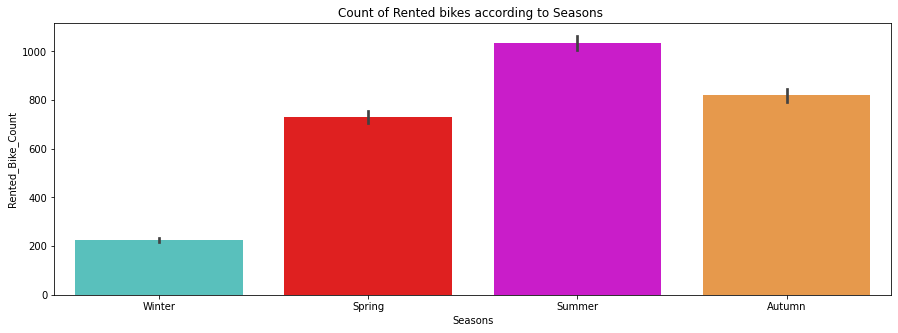

In [579]:
# Chart - 4 visualization code
fig,ax=plt.subplots(figsize=(15,5))
color =["#48D1CC","#ff0000","#e600e6","#ff9933"]
sns.barplot(data=df,x='Seasons',y='Rented_Bike_Count',ax=ax,palette=color)
ax.set(title='Count of Rented bikes according to Seasons ');


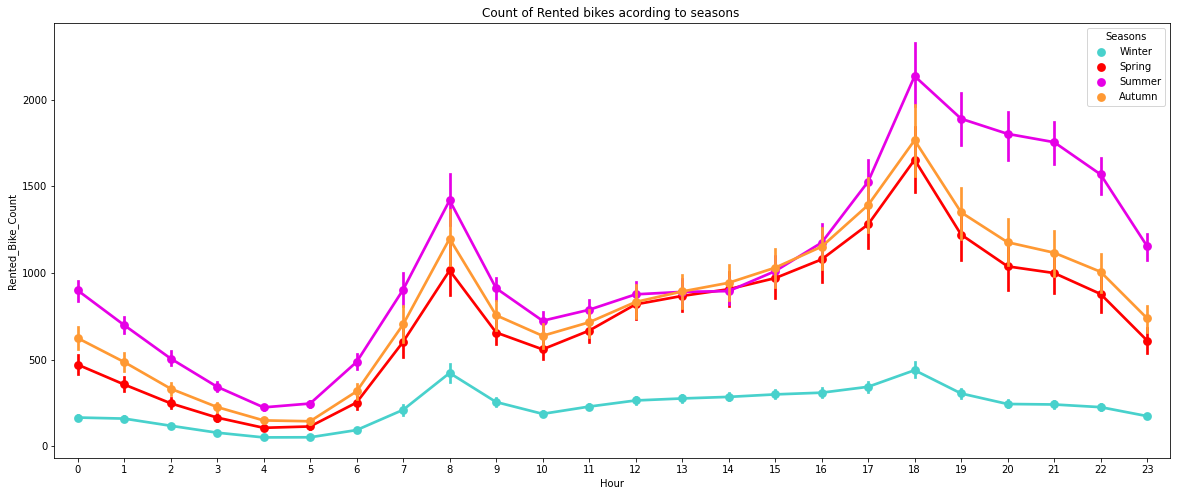

In [580]:
fig,ax=plt.subplots(figsize=(20,8))
color =["#48D1CC","#ff0000","#e600e6","#ff9933"]
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax, palette=color)
ax.set(title='Count of Rented bikes acording to seasons ');

##### 1. Why did you pick the specific chart?

**Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.The characteristics that make a good bar graph are as follows: Easy comparisons between different variables. Clarity in displaying trends in data. Easy determination in the value of a variable.**

**Line graphs can be used to show how something changes over time. Line graphs are good for plotting data that has peaks (ups) and valleys (downs), or that was collected in a short time period.A line graph connects individual data points that, typically, display quantitative values over a specified time interval.**

##### 2. What is/are the insight(s) found from the chart?

**The above bar plot and point plotshows the use of rented bike during the four different seasons throughout the day, and it can be clearly seen that,**
**In summer season the use of rented bike is high and peak time is 7am to 9am and 5pm to 7pm.**

**Followed by the Autumn Season and Spring Season, and the peak hours are same i.e 7am to 9am and 5pm to 7pm.**

**In winter season the use of rented bike is very very low because of snowfall.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### **Chart - 5 Count of Rented bikes according to Month (Bivariate)**

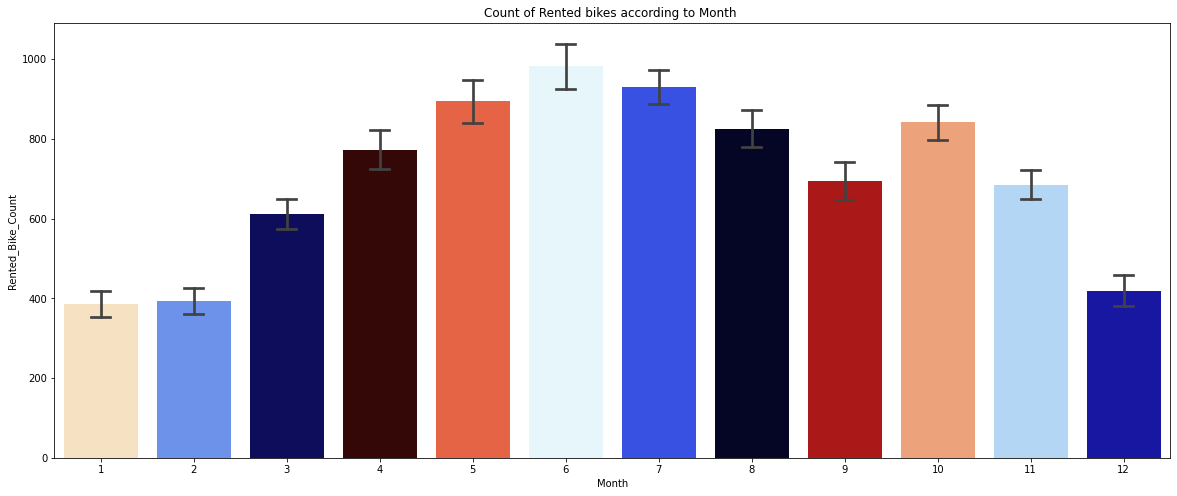

In [581]:
# Chart - 5 visualization code
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data= df,x='Month',y='Rented_Bike_Count',ax=ax,capsize=.2, palette="flag")
ax.set(title='Count of Rented bikes according to Month ');

##### 1. Why did you pick the specific chart?

**Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.The characteristics that make a good bar graph are as follows: Easy comparisons between different variables. Clarity in displaying trends in data. Easy determination in the value of a variable.**

##### 2. What is/are the insight(s) found from the chart?

**From this bar plot we can clearly see that the Demand of the rental bike is maximum during 4th Month to 10th Month i.e April to October which comes under Spring, Summer and Autumn and least in 12th, 1st and 2nd i.e December, January and February.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### **Chart - 6 Count of Rented bikes according to Functioning Day (Bivariate)**

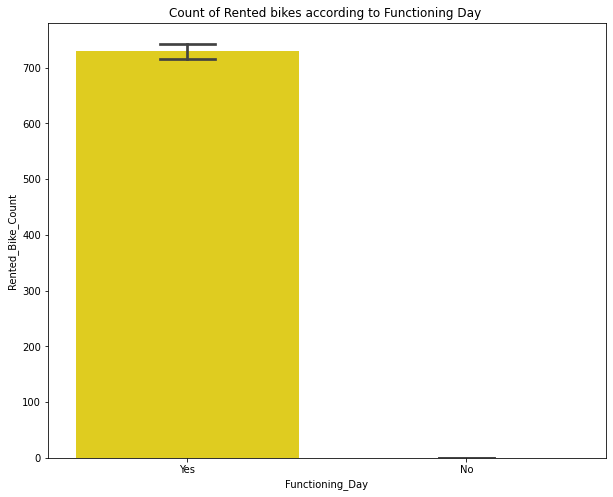

In [582]:
# Chart - 6 visualization code
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2, palette ="jet_r" )
ax.set(title='Count of Rented bikes according to Functioning Day ');

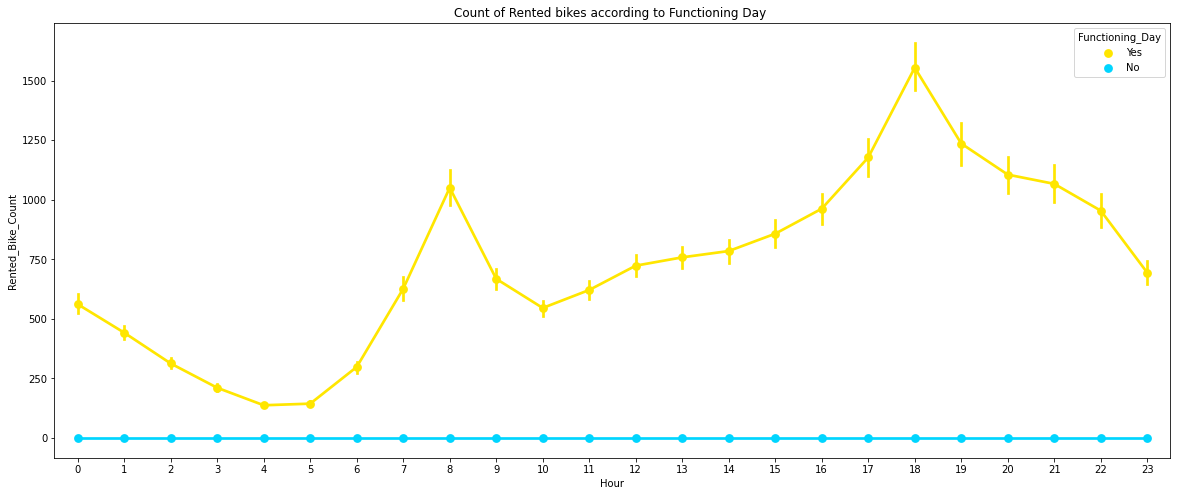

In [583]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax,palette ="jet_r")
ax.set(title='Count of Rented bikes according to Functioning Day ');

##### 1. Why did you pick the specific chart?

**Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.The characteristics that make a good bar graph are as follows: Easy comparisons between different variables. Clarity in displaying trends in data. Easy determination in the value of a variable.**

**Line graphs can be used to show how something changes over time. Line graphs are good for plotting data that has peaks (ups) and valleys (downs), or that was collected in a short time period.A line graph connects individual data points that, typically, display quantitative values over a specified time interval.**

##### 2. What is/are the insight(s) found from the chart?

**The above Bar Plot and Line Plot are used to show the Demand of rental bikes during Functioning and Non Functioning day and it clearly shows the people dont use rental bikes at during during Functioning day.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### **Chart - 7 Count of Rented bikes according to Holiday (Bivariate)**

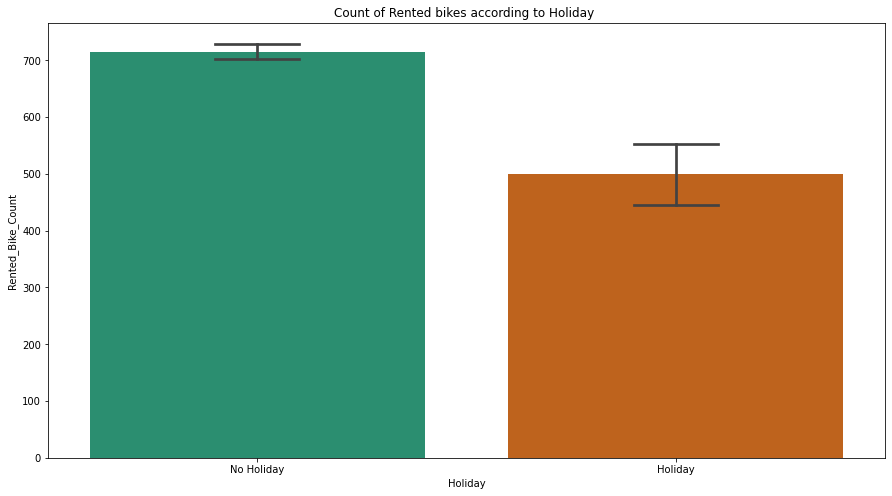

In [584]:
# Chart - 7 visualization code
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2, palette = "Dark2")
ax.set(title='Count of Rented bikes according to Holiday ');

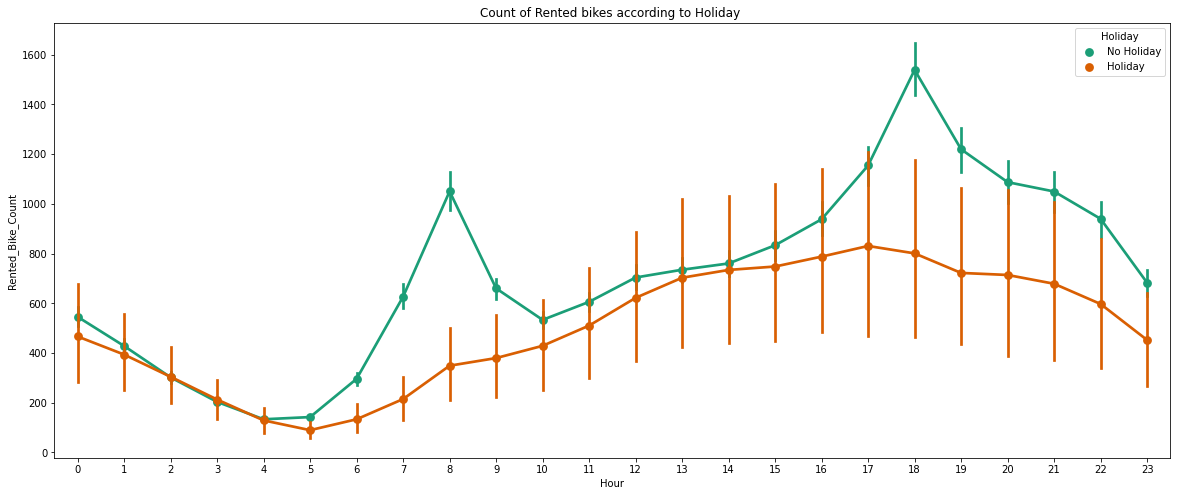

In [585]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax, palette = "Dark2")
ax.set(title='Count of Rented bikes according to Holiday ');

##### 1. Why did you pick the specific chart?

**Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.The characteristics that make a good bar graph are as follows: Easy comparisons between different variables. Clarity in displaying trends in data. Easy determination in the value of a variable.**

**Line graphs can be used to show how something changes over time. Line graphs are good for plotting data that has peaks (ups) and valleys (downs), or that was collected in a short time period.A line graph connects individual data points that, typically, display quantitative values over a specified time interval.**

##### 2. What is/are the insight(s) found from the chart?

**From the Graphs above we can see that the demand of rental bikes is more on non-holiday day and the peak hours are 7am-10am and 5pm-7pm.**

**The demand on holiday day is more between 1pm-7pm.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## **Analysis of Numerical variables**

What are Numerical variables?

### **Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.**

#### Chart - 8

As we know that in our data numerical datatype are of two types i.e integer and float. Thus we will collect the columns having this datatype in a single list.

In [586]:
# Chart - 8 visualization code
numericvar_columns=list(df.select_dtypes(['int64','float64']).columns)
numericvar_features=pd.Index(numericvar_columns)
numericvar_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

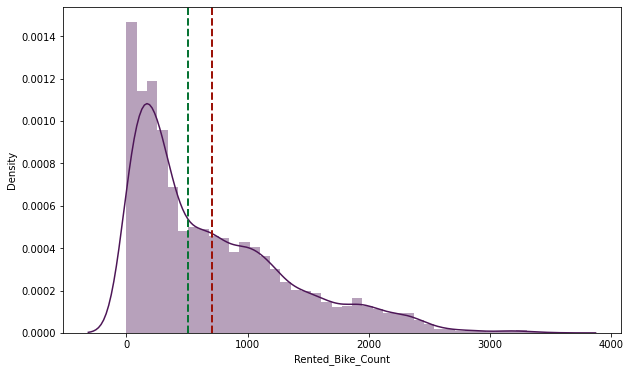

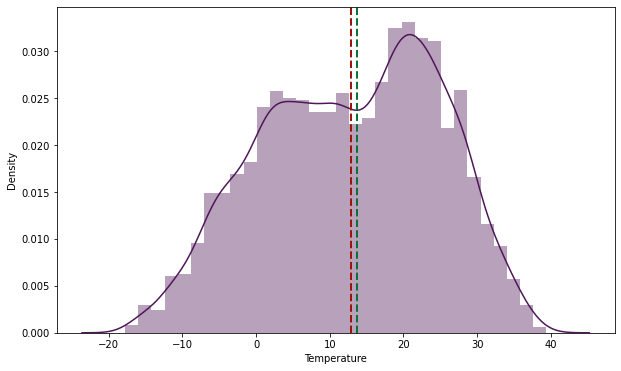

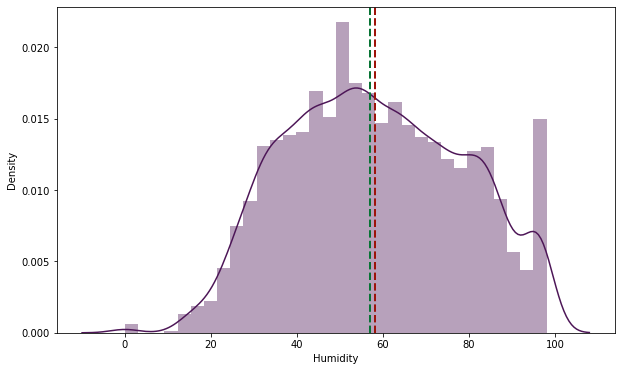

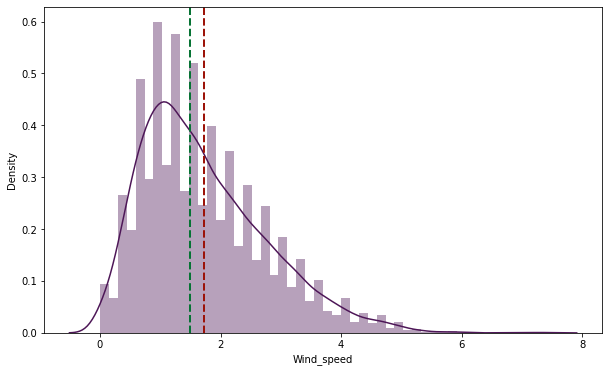

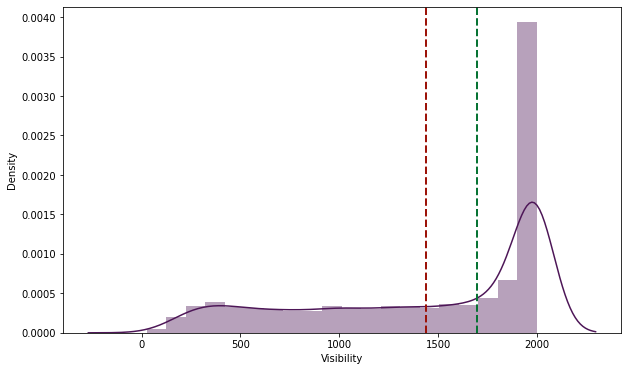

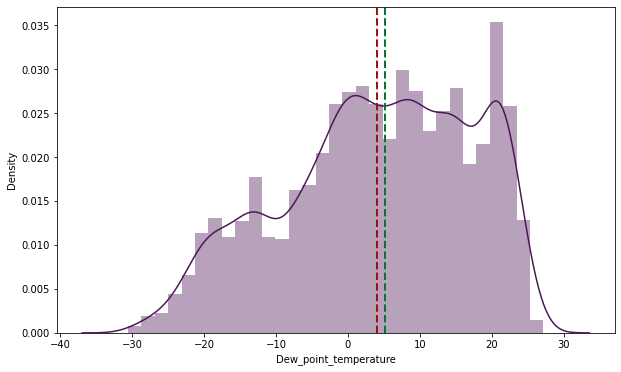

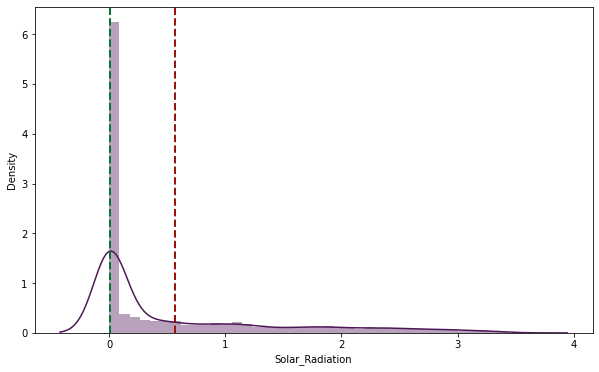

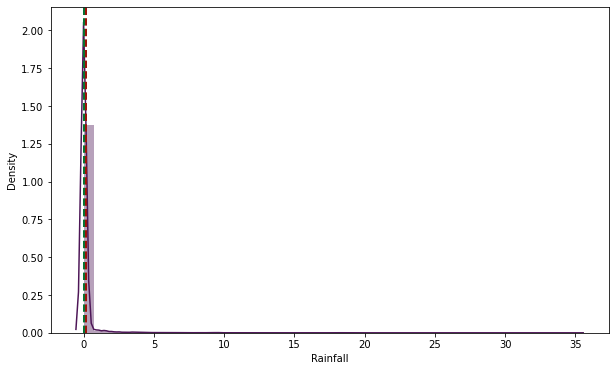

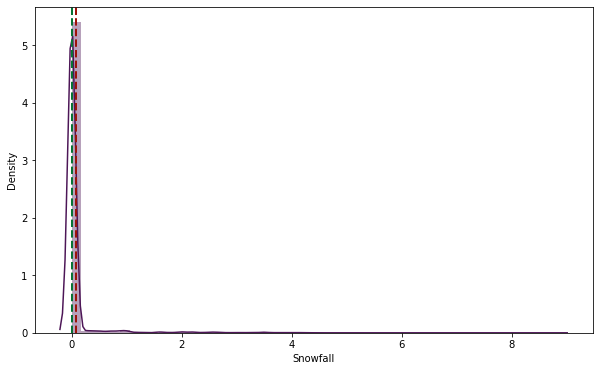

In [587]:
#printing displots to analyze the distribution of all numerical variables
for col in numericvar_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[col], color= "#4d1657")
  plt.xlabel(col)
  plt.axvline(df[col].mean(), color='#9c1309', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='#077334', linestyle='dashed', linewidth=2)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### **Chart - 9 Numerical Variables (independent) vs Rented bike count (dependent)**

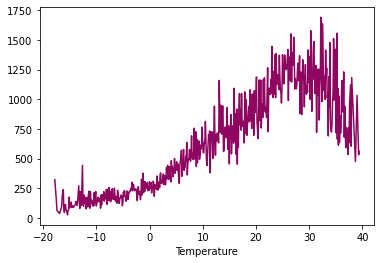

In [588]:
# Chart - 9 visualization code
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature" 
df.groupby('Temperature').mean()['Rented_Bike_Count'].plot(color = "#8f0661");

**From the above graph plot of Temperature vs Rented bike count we can see that the most of the bikes are in demand during the temperature between 20°C to 30°C. And as the temperature decreases the bike demand count also decreases significantly.**

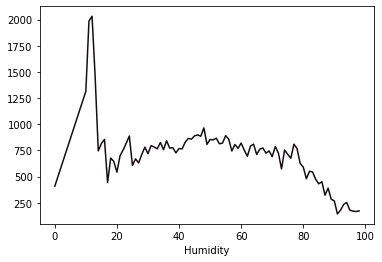

In [589]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Humidity" 
df.groupby('Humidity').mean()['Rented_Bike_Count'].plot(color = "#140c12");

**From the above graph plot we can see that when the humidity is low the demand for the bike is high and as the humidity increases the demand decreases.**

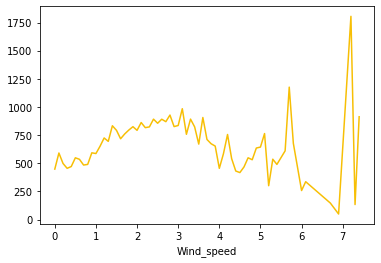

In [590]:
# #print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed" 
df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot(color = "#f7bf05");

**We can see from the above graph plot that the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind is 7 m/s then the demand of bike also increase that clearly means peoples love to ride bikes when its little windy.**

In [591]:
# #print the plot to analyze the relationship between "Rented_Bike_Count" and "Visibility" 
# df.groupby('Visibility').mean()['Rented_Bike_Count'].plot(color = "#24756d");

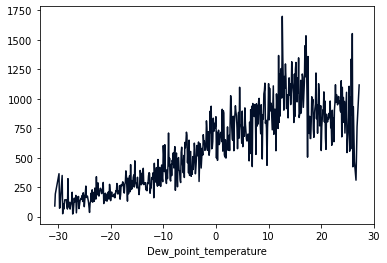

In [592]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature" 
df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot(color = "#020f29");

**From the above graph plot of Dew point temperature vs Rented bike count we can see that this graph is almost identical to temperature vs rented bike count graph.**

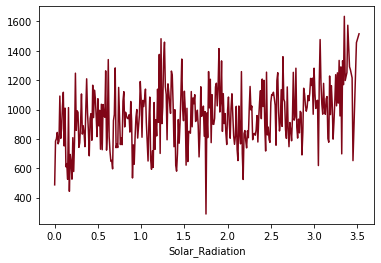

In [593]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation" 
df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot(color = "#800617");

**From the above graph plot of Solar Radiation vs Rented bike count we can see that Demand is high when the solar radiation is present. There most people like to rent bike when there is good amount of solar radiation. General count of bike rented when the solar radiation is present is above 1000.**

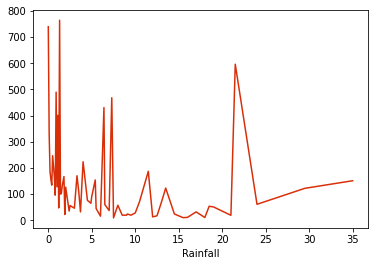

In [594]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall" 
df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot(color = "#d92f09");

**From this graph plot of Rainfall vs Rental bike count we can see that most of te bikes are rented when there is no rain but even if the rain is increasing the demand of the rental bike is not declining completely.**

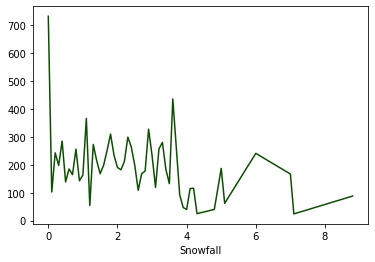

In [595]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall" 
df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot(color = "#0c4d02");

**From the above graph of Snowfall vs Rented bike count we can see that the demand is highest when there is no snow but upto 4cm there is still some demand in rental bikes but as the snow crosses 4cm the demand decreases completely.**

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## **Chart - 10  Regression Plot**

What is the use of regression plot?

### **The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.**

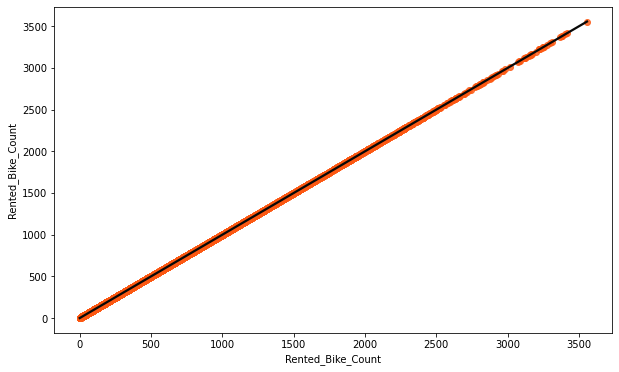

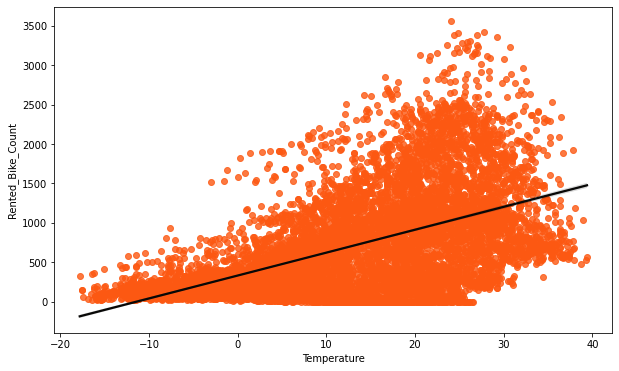

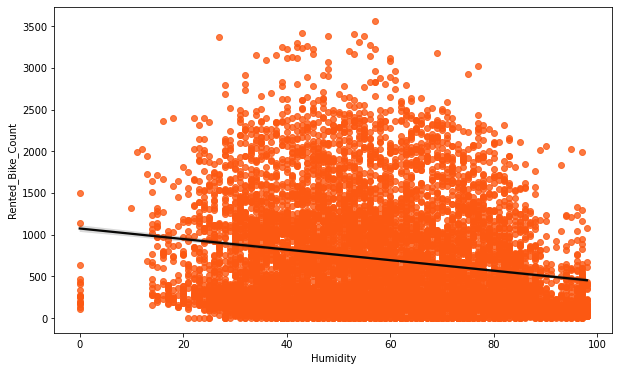

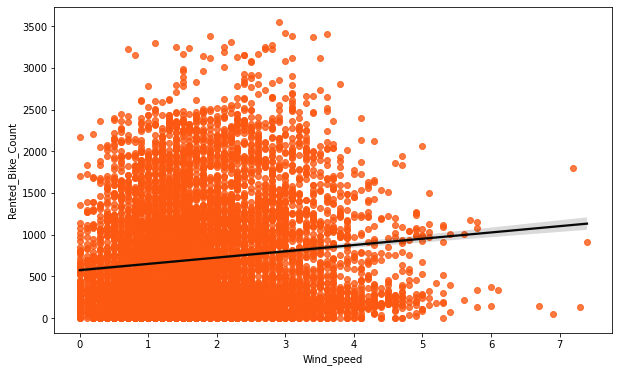

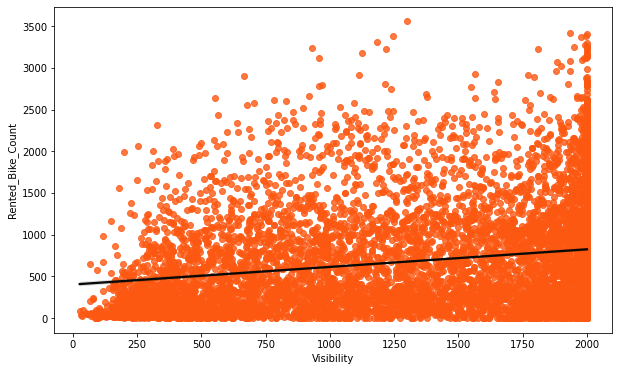

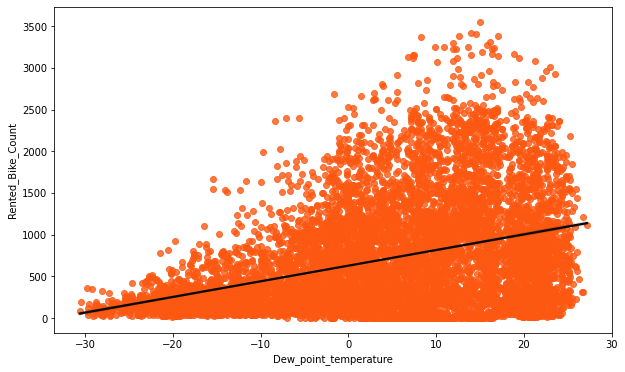

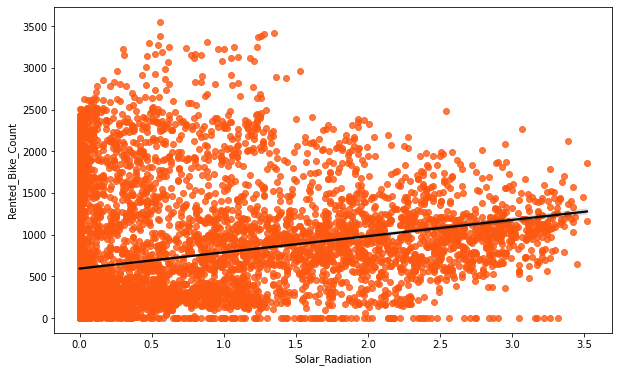

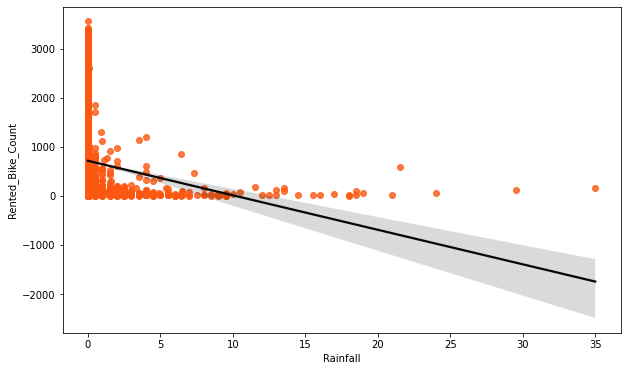

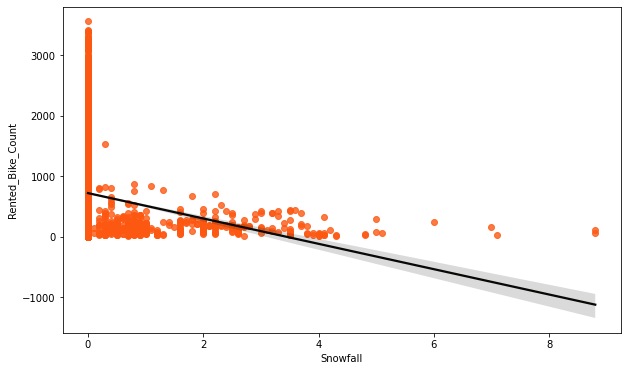

In [596]:
# Chart - 10 visualization code
#printing the regression plot for all the numerical features
for col in numericvar_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={"color": '#fc5812'}, line_kws={"color": "#080807"})

##### 1. Why did you pick the specific chart?

**Regression analysis is a reliable method of identifying which variables have impact on a topic of interest. The process of performing a regression allows you to confidently determine which factors matter most, which factors can be ignored, and how these factors influence each other.**

##### 2. What is/are the insight(s) found from the chart?

**From the above regression plot of all numerical variables we can see that the independent variables 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positive in relation to the target variable which means that the Rented bike count increases with the increase in all of these features.**

**'Rainfall','Snowfall'and 'Humidity' these independent variables are negative in relation with the target variable which means that the Rented bike count decreases with the increase in these features.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [597]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [598]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [599]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

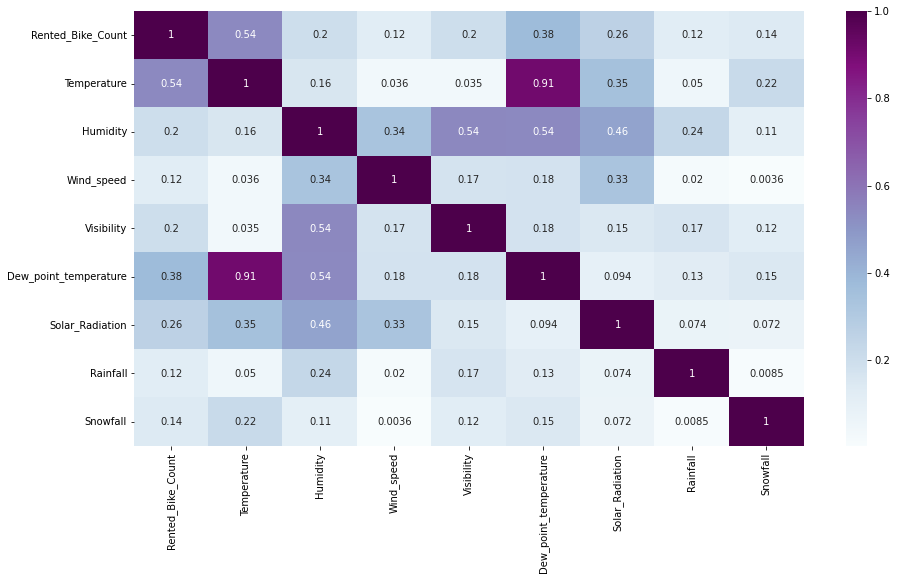

In [600]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,8))
corr=df.corr()
sns.heatmap(data=abs(corr),annot=True,cmap="BuPu");


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [601]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [602]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [603]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [604]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Month                    0
week                     0
timeshift                0
dtype: int64


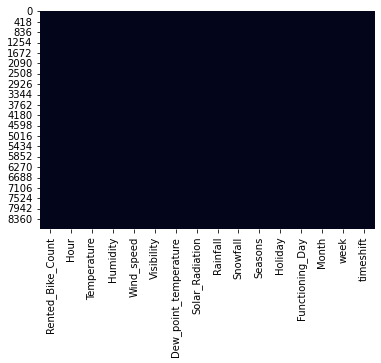

In [605]:
# Handling Missing Values & Missing Value Imputation

# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [606]:
df = df.dropna()

#### What all missing value imputation techniques have you used and why did you use those techniques?

### There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [607]:
# Handling Outliers & Outlier treatments
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 4 categorical variables


In [608]:
# find Numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 12 numerical variables


In [609]:
discrete = []
for var in numerical:
    if len(df[var].unique())<20:
        print(var, ' values: ', df[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

Month  values:  [1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]
week  values:  [0, 1]
Categories (2, int64): [0, 1]
There are 2 discrete variables


In [610]:
continuous = [var for var in numerical if var not in discrete and var not in ['Rented_Bike_Count']]

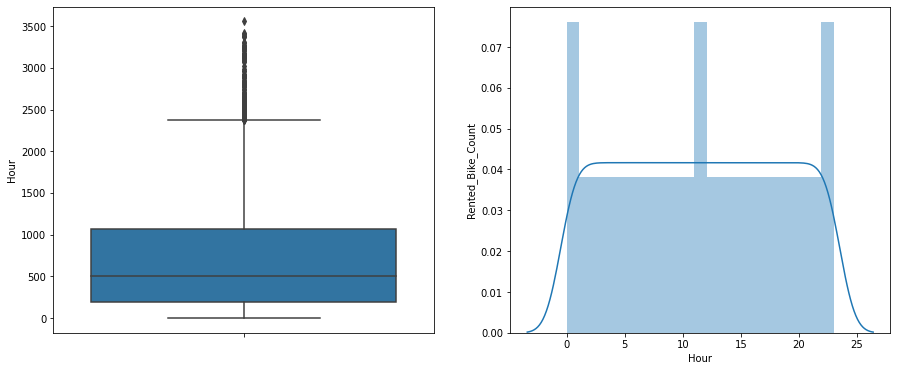

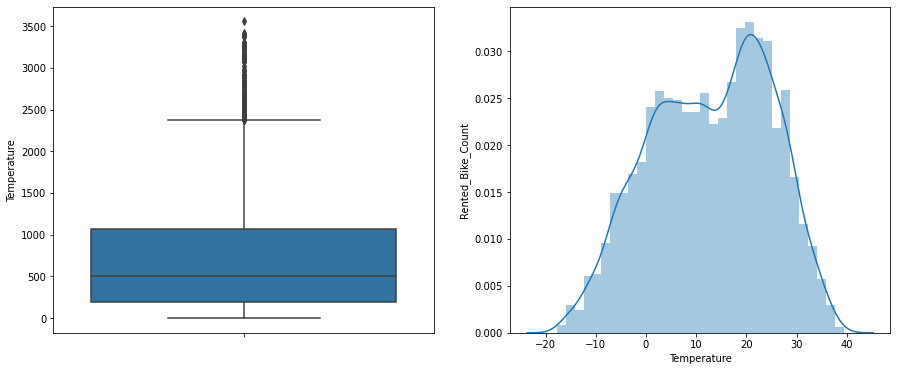

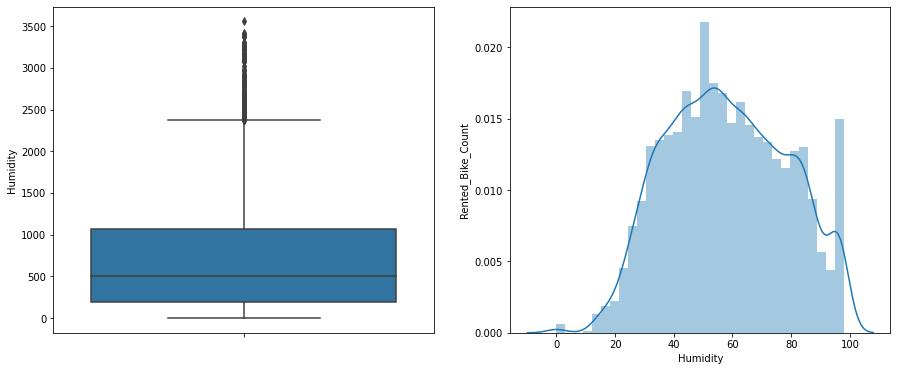

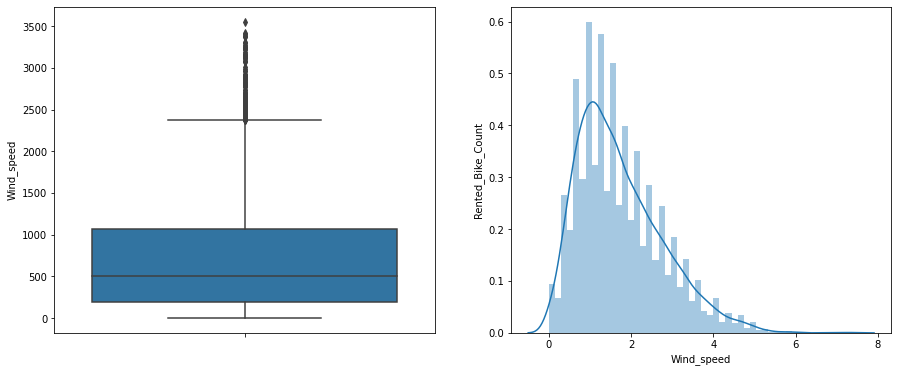

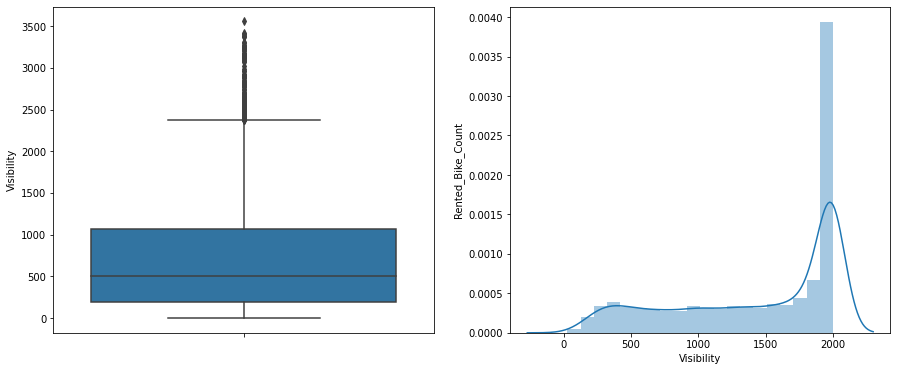

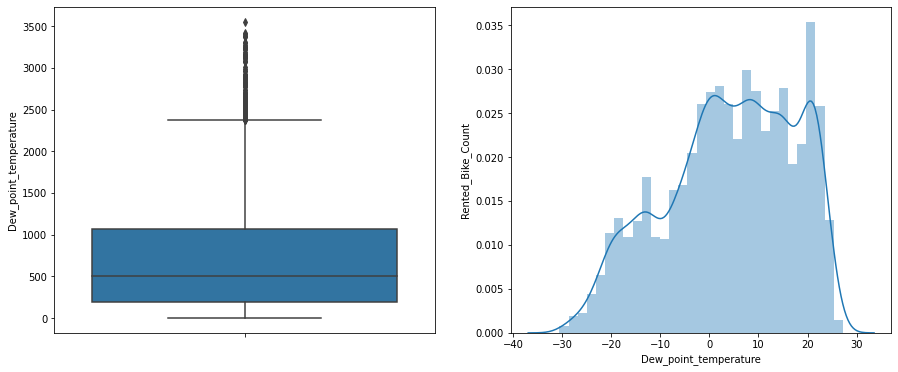

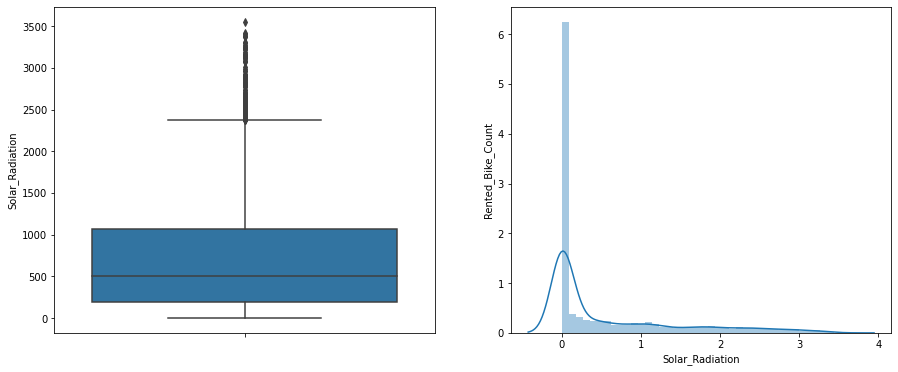

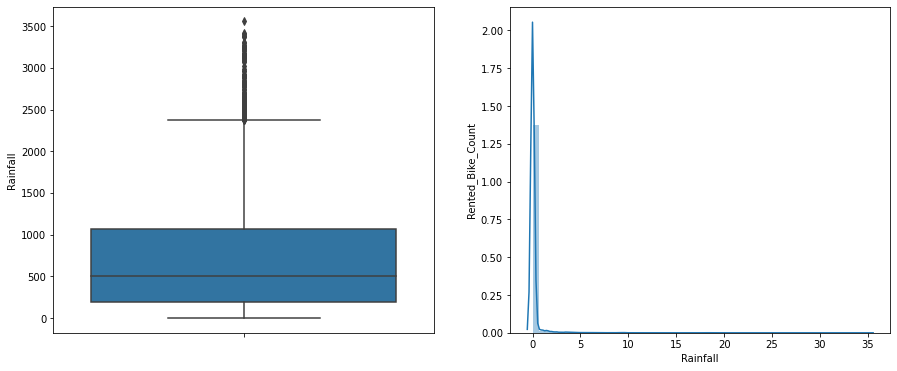

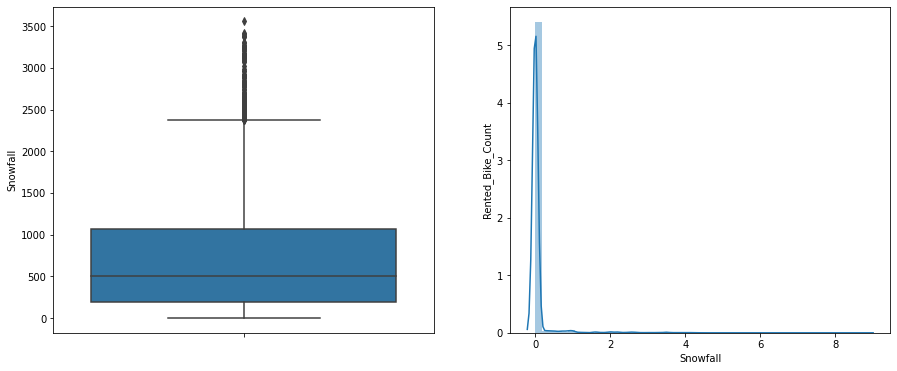

In [611]:
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y = df["Rented_Bike_Count"])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna())
    fig.set_ylabel("Rented_Bike_Count")
    fig.set_xlabel(var)

    plt.show()

In [612]:
# finding the inter-quartile range 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented_Bike_Count         874.25
Temperature                19.00
Humidity                   32.00
Wind_speed                  1.40
Visibility               1060.00
Dew_point_temperature      19.50
Solar_Radiation             0.93
Rainfall                    0.00
Snowfall                    0.00
dtype: float64


In [613]:
# listing features to remove outliers

features = list(df.columns)
features = features[2:]
list_0 = ['Hour','Seasons','Holiday','Functioning_Day','Month','year','week']
new_features = [x for x in features if x not in list_0]
new_features

['Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'timeshift']

In [614]:
# removing outliers

'left == right'
df[new_features] = df[new_features][~((df[new_features] < (Q1 - 1.5 * IQR)) |(df[new_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [615]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            7078 non-null   float64 
 3   Humidity               7078 non-null   float64 
 4   Wind_speed             7078 non-null   float64 
 5   Visibility             7078 non-null   float64 
 6   Dew_point_temperature  7078 non-null   float64 
 7   Solar_Radiation        7078 non-null   float64 
 8   Rainfall               7078 non-null   float64 
 9   Snowfall               7078 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  Month                  8760 non-null   category
 14  week                   8760 non-null   c

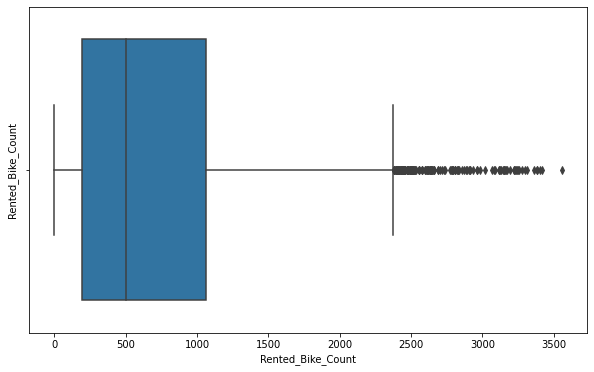

In [616]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=df['Rented_Bike_Count'])
plt.show()

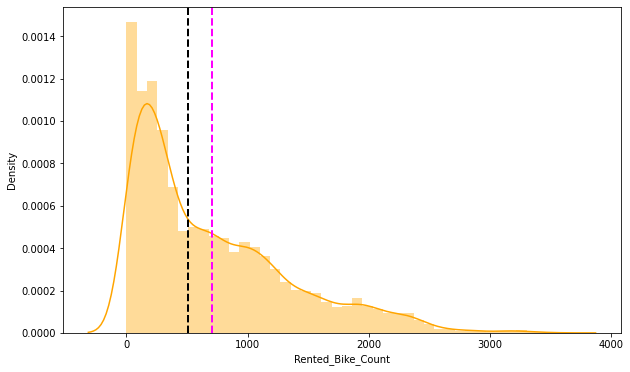

In [617]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented_Bike_Count'],hist=True ,color="orange")
ax.axvline(df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

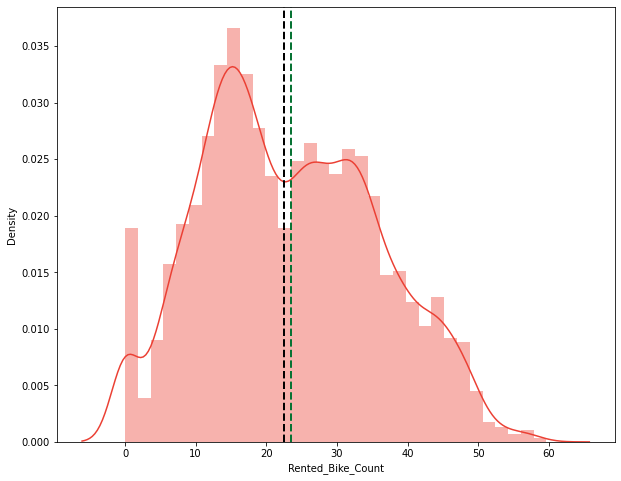

In [618]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented_Bike_Count']), color="#eb4034")
ax.axvline(np.sqrt(df['Rented_Bike_Count']).mean(), color='#077334', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

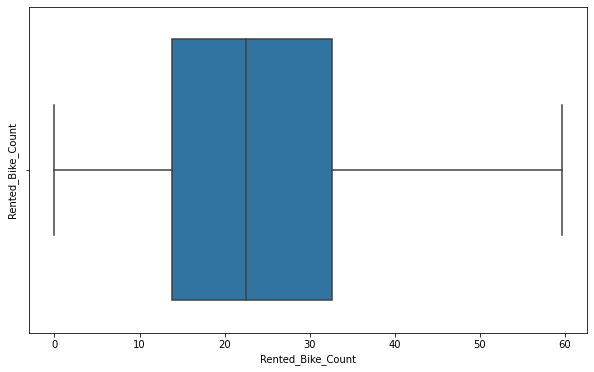

In [619]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']))
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [620]:
# Encode your categorical columns
# Lets take care of the categorical features
categorical_features = [i for i in df.columns if i not in df.describe().columns]
categorical_features

['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month', 'week', 'timeshift']

In [621]:
# Checking unique value with their counts in categorical features
for col in categorical_features:
  print(df[col].value_counts(),'\n')

0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64 

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64 

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64 

Yes    8465
No      295
Name: Functioning_Day, dtype: int64 

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64 

0    6216
1    2544
Name: week, dtype: int64 

day        2565
evening    2278
night      2235
Name: timeshift, dtype: int64 



In [622]:
# Encode your categorical columns

encoder = {'Holiday':{'Holiday':1, 'No Holiday':0},'Functioning_Day':{'Yes':1, 'No': 0},
          'timeshift': {'night':0, 'day':1, 'evening':2}}

In [623]:
# Label Encoding
df = df.replace(encoder)
# One Hot Encoding
df = pd.get_dummies(df, columns=["Seasons","Hour"], prefix='', prefix_sep='')

In [624]:
# New look
df.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Holiday,...,14,15,16,17,18,19,20,21,22,23
0,254,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [625]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [626]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [627]:
df = df.dropna()

In [628]:
df=df.drop(['Rainfall','Snowfall'],axis=1)

In [629]:
# Checking VIF for each variable
independent_variables = [i for i in df.columns if i not in ['Rented_Bike_Count']]
calc_vif(df[independent_variables])

,variables,VIF
0,Temperature,91.035475
1,Humidity,17.966267
2,Wind_speed,1.408613
3,Visibility,1.573239
4,Dew_point_temperature,119.924899
5,Solar_Radiation,4.274525
6,Holiday,1.032790
7,Functioning_Day,1.088239
8,Month,1.302909
9,week,1.007393


In [630]:
# Summer and Winter are highly correlated with temperature. Hence removing them
independent_variables = [i for i in df.columns if i not in ['Rented_Bike_Count','Winter','Summer','Dew_point_temperature','Hour','Humidity']]
calc_vif(df[independent_variables])

,variables,VIF
0,Temperature,1.232504
1,Wind_speed,1.404650
2,Visibility,1.125051
3,Solar_Radiation,3.728569
4,Holiday,1.014753
5,Functioning_Day,1.082954
6,Month,1.212185
7,week,1.005044
8,timeshift,inf
9,Autumn,1.373836


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [631]:
# Transform Your data

### 6. Data Scaling

In [632]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [633]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [634]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [635]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [636]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [637]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [638]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [639]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [640]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [641]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [642]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [643]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [644]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [645]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***